# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:black">Um banco quer entender melhor quanto seus novos clientes ganham, sem precisar solicitar informações a birô de crédito como serasa. Isso vai ajudar a oferecer limites mais adequados para todo tipo de serviços financeiros, tornando tudo mais fácil para o cliente.
Para fazer isso, o banco está criando um sistema inteligente que vai "adivinhar" a renda dos clientes usando informações que já tem.

O que o banco quer:

1 - Tomar decisões melhores sobre crédito.

2 - Oferecer produtos que realmente combinam com cada cliente.

3 - Entender melhor o perfil financeiro dos clientes.

No fim das contas, a ideia é tornar a experiência bancária mais simples e agradável para todos, sem precisar de um monte de burocracia. É uma forma de o banco e os clientes crescerem juntos, de um jeito mais moderno e eficiente.
</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red"></span>


### Dicionário de dados

<span style="color:red"></span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                | Data de referência da informação                    | object       |
| id_cliente              | Identificador único do cliente                      | int64        |
| sexo                    | Sexo do cliente                                     | object       |
| posse_de_veiculo        | Indica se o cliente possui veículo                  | bool         |
| posse_de_imovel         | Indica se o cliente possui imóvel                   | bool         |
| qtd_filhos              | Quantidade de filhos do cliente                     | int64        |
| tipo_renda              | Tipo de renda do cliente                            | object       |
| educacao                | Nível de educação do cliente                        | object       |
| estado_civil            | Estado civil do cliente                             | object       |
| tipo_residencia         | Tipo de residência do cliente                       | object       |
| idade                   | Idade do cliente                                    | int64        |
| tempo_emprego           | Tempo de emprego do cliente (em anos)               | float64      |
| qt_pessoas_residencia   | Quantidade de pessoas na residência do cliente      | float64      |
| renda                   | Renda do cliente                                    | float64      |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from pandas_profiling import ProfileReport
from tqdm import tqdm


%matplotlib inline
warnings.filterwarnings("ignore")

tqdm.pandas()

print("Sucesso")

Sucesso


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [242]:
# Carregando os dados
df = pd.read_csv('previsao_de_renda.csv')

# Dropando Colunas sem Valor
df.drop(columns=['data_ref', 'Unnamed: 0', 'index'], inplace=True)

# Dropando Linhas Duplicadas
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [244]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 8704 entries, 0 to 14992
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   8704 non-null   object 
 1   posse_de_veiculo       8704 non-null   bool   
 2   posse_de_imovel        8704 non-null   bool   
 3   qtd_filhos             8704 non-null   int64  
 4   tipo_renda             8704 non-null   object 
 5   educacao               8704 non-null   object 
 6   estado_civil           8704 non-null   object 
 7   tipo_residencia        8704 non-null   object 
 8   idade                  8704 non-null   int64  
 9   tempo_emprego          8704 non-null   float64
 10  qt_pessoas_residencia  8704 non-null   float64
 11  mau                    8704 non-null   bool   
 12  renda                  8704 non-null   float64
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 773.5+ KB


sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [246]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [248]:
# Gerando o relatório
profile = ProfileReport(df, title="Relatório de Análise de Dados", explorative=True, minimal=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [250]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
qtd_filhos,8704.0,0.516659,0.794788,0.000000,0.000000,0.000000,1.000000,14.000000
idade,8704.0,40.755515,9.356902,22.000000,33.000000,40.000000,48.000000,67.000000
tempo_emprego,8704.0,7.769067,6.758506,0.191781,3.049315,6.043836,10.123288,42.906849
qt_pessoas_residencia,8704.0,2.312960,0.946306,1.000000,2.000000,2.000000,3.000000,15.000000
renda,8704.0,4852.248810,4912.862931,159.900000,2023.617500,3407.930000,5940.287500,89918.040000


### Entendimento dos dados - Bivariadas




In [252]:
# Separar as colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculando a matriz de correlação
corr_matrix = df[numeric_cols].corr()

# Mostrando as correlações da variavel renda
target_correlations = corr_matrix['renda'].sort_values(ascending=False)
print("Correlações com a variável renda:")
target_correlations

Correlações com a variável renda:


renda                    1.000000
tempo_emprego            0.403591
idade                    0.151138
qt_pessoas_residencia   -0.009074
qtd_filhos              -0.018920
Name: renda, dtype: float64

In [253]:
print("Podemos ver com base nos dados acima que, a variavel 'tempo_emprego' é a que tem a maior correlação a variavel renda")

Podemos ver com base nos dados acima que, a variavel 'tempo_emprego' é a que tem a maior correlação a variavel renda


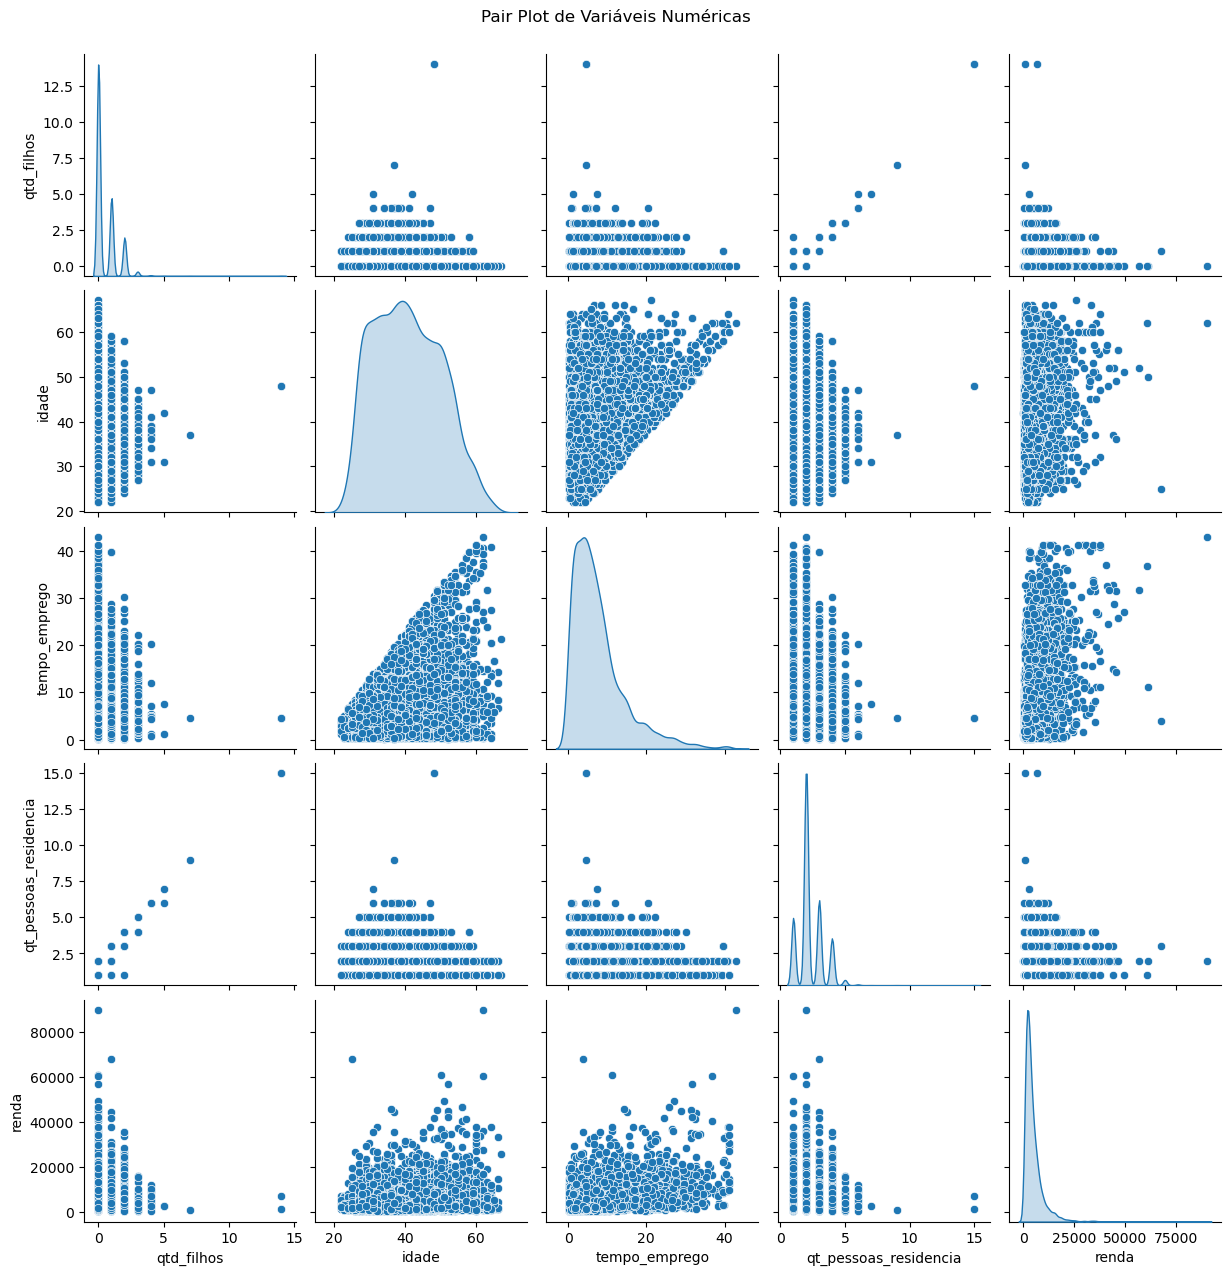

In [254]:
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.suptitle('Pair Plot de Variáveis Numéricas', y=1.02)
plt.show()

In [255]:
print("O pairplot revela outliers significativos na variável 'renda', que, embora infrequentes, podem impactar análises futuras. Observa-se também uma correlação geralmente fraca entre as variáveis quantitativas, com exceção de uma relação positiva moderada entre 'renda' e 'tempo_emprego'. Estas observações visuais confirmam os resultados da matriz de correlação anteriormente analisada. A distribuição assimétrica da 'renda' e as relações não-lineares evidentes sugerem a necessidade de abordagens analíticas mais complexas.")

O pairplot revela outliers significativos na variável 'renda', que, embora infrequentes, podem impactar análises futuras. Observa-se também uma correlação geralmente fraca entre as variáveis quantitativas, com exceção de uma relação positiva moderada entre 'renda' e 'tempo_emprego'. Estas observações visuais confirmam os resultados da matriz de correlação anteriormente analisada. A distribuição assimétrica da 'renda' e as relações não-lineares evidentes sugerem a necessidade de abordagens analíticas mais complexas.


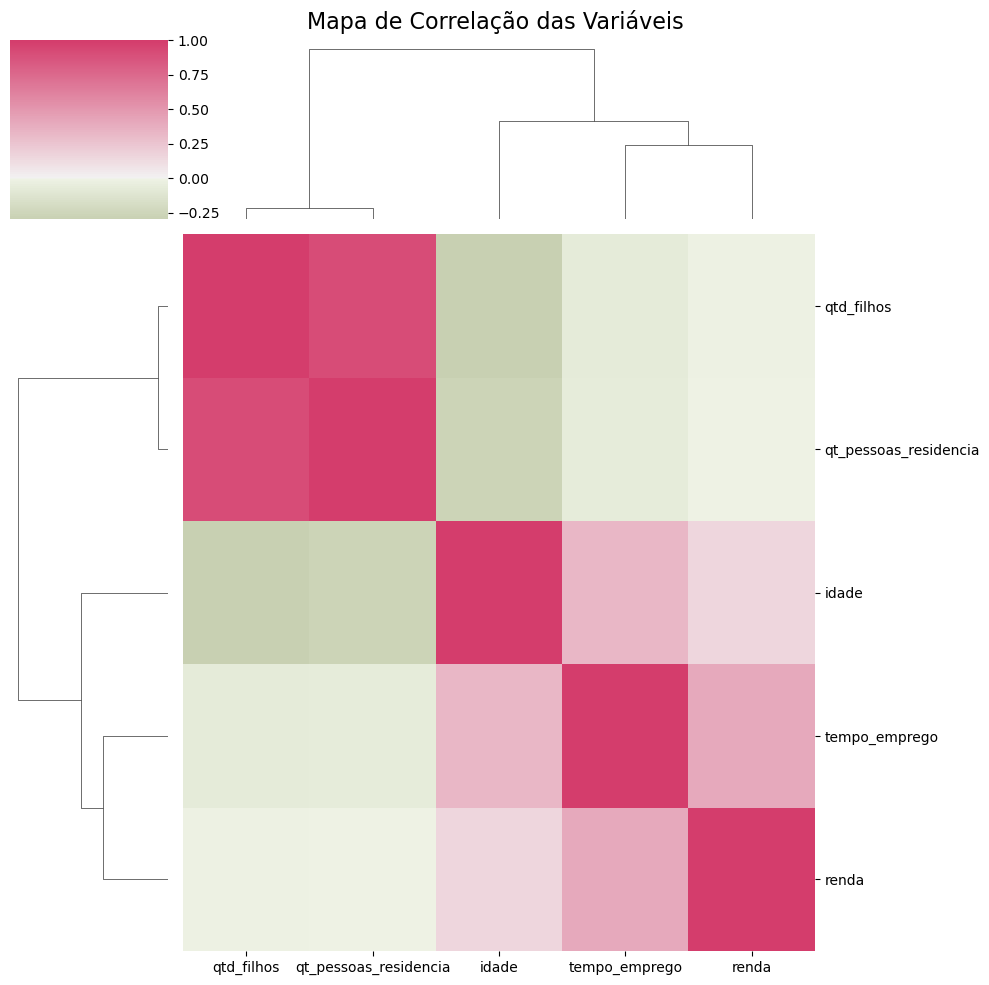

In [256]:
cmap = sns.diverging_palette(h_neg=100, h_pos=359, as_cmap=True, sep=1, center='light')
g = sns.clustermap(data=corr_matrix, figsize=(10, 10), center=0, cmap=cmap)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
g.fig.suptitle('Mapa de Correlação das Variáveis', fontsize=16)
plt.tight_layout()
g.fig.subplots_adjust(top=0.95)
plt.show()

In [257]:
print("O heatmap revela uma forte correlação positiva entre 'qtd_filhos' e 'qt_pessoas_residencia', e correlações moderadas entre 'tempo_emprego' e 'renda', assim como entre 'idade' e 'tempo_emprego'. As demais relações são geralmente fracas. 'Tempo_emprego' emerge como o preditor mais relevante para 'renda', enquanto variáveis relacionadas ao tamanho da família mostram pouca relação linear com a renda. A estrutura de correlações sugere a necessidade de considerar possíveis multicolinearidades, especialmente entre idade e tempo de emprego, em futuras análises preditivas.")

O heatmap revela uma forte correlação positiva entre 'qtd_filhos' e 'qt_pessoas_residencia', e correlações moderadas entre 'tempo_emprego' e 'renda', assim como entre 'idade' e 'tempo_emprego'. As demais relações são geralmente fracas. 'Tempo_emprego' emerge como o preditor mais relevante para 'renda', enquanto variáveis relacionadas ao tamanho da família mostram pouca relação linear com a renda. A estrutura de correlações sugere a necessidade de considerar possíveis multicolinearidades, especialmente entre idade e tempo de emprego, em futuras análises preditivas.


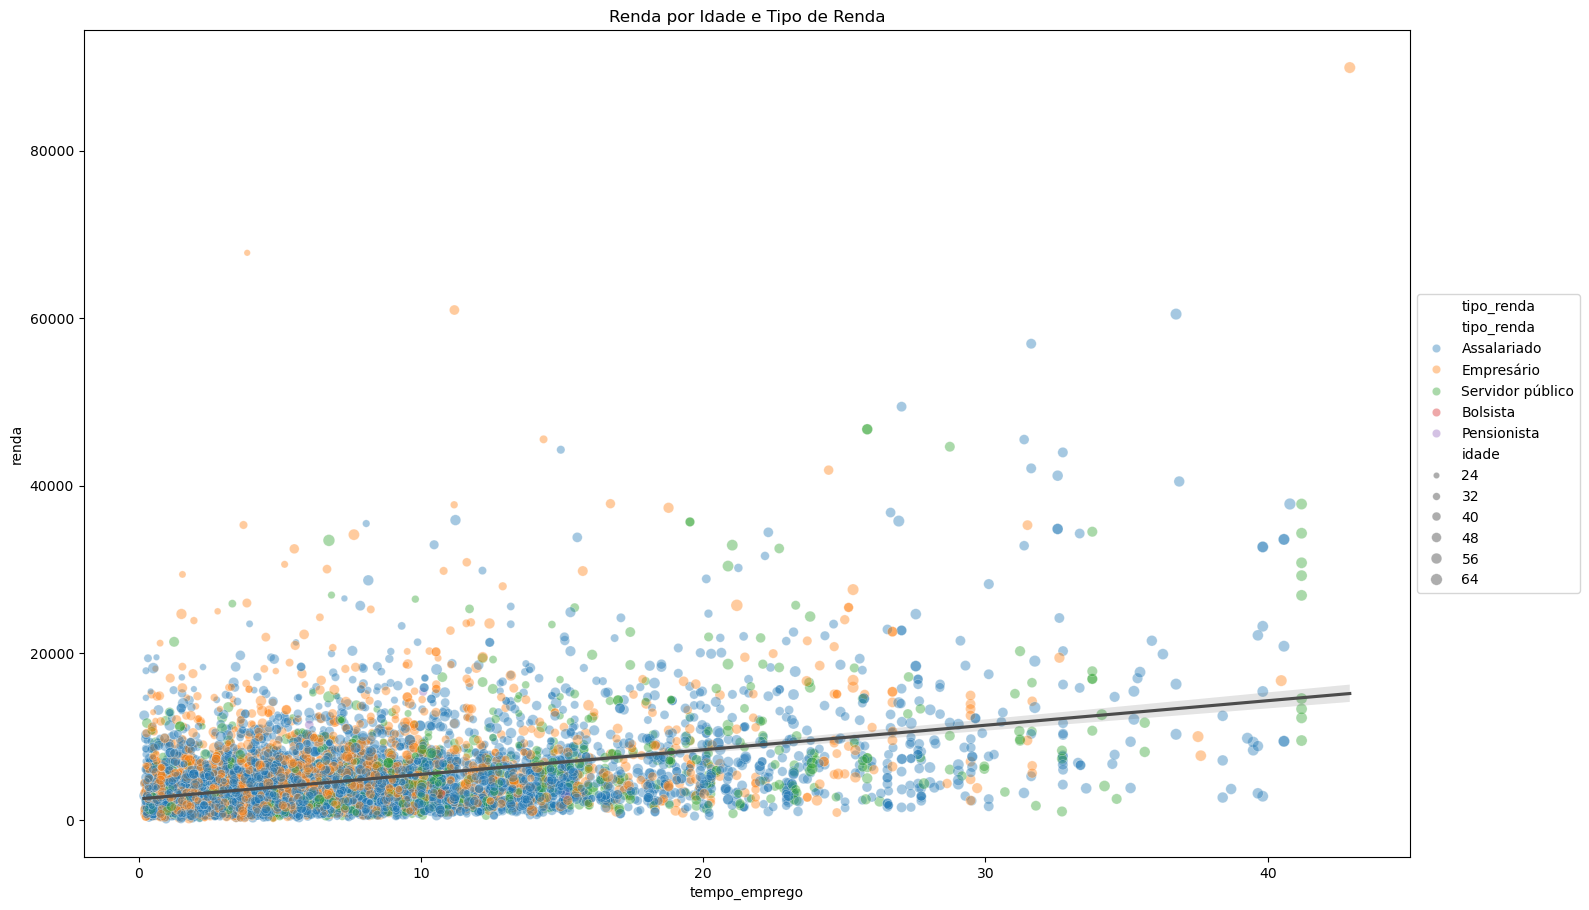

In [258]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='tempo_emprego', y='renda', hue='tipo_renda', size='idade', data=df, alpha=0.4)
sns.regplot(x='tempo_emprego', y='renda', data=df, scatter=False, color='.3')
plt.legend(title='tipo_renda', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.title('Renda por Idade e Tipo de Renda')
plt.show()

In [259]:
print("O gráfico revela uma correlação positiva entre tempo de emprego e renda, com significativa dispersão dos dados. Concentrações maiores são observadas em rendas baixas e tempos de emprego curtos, com outliers notáveis em rendas altas. Servidores públicos e empresários tendem a ocupar faixas de renda superiores. A relação idade-renda é menos evidente, porém idades mais avançadas associam-se a maiores tempos de emprego. A diversidade de cores e tamanhos dos pontos ilustra a complexidade das relações entre as variáveis analisadas.")

O gráfico revela uma correlação positiva entre tempo de emprego e renda, com significativa dispersão dos dados. Concentrações maiores são observadas em rendas baixas e tempos de emprego curtos, com outliers notáveis em rendas altas. Servidores públicos e empresários tendem a ocupar faixas de renda superiores. A relação idade-renda é menos evidente, porém idades mais avançadas associam-se a maiores tempos de emprego. A diversidade de cores e tamanhos dos pontos ilustra a complexidade das relações entre as variáveis analisadas.


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [261]:
pd.DataFrame(index=df.nunique().index, data={'tipos_dados': df.dtypes, 'qtd_valores': df.notna().sum(), 'qtd_categorias': df.nunique().values})

,tipos_dados,qtd_valores,qtd_categorias
sexo,object,8704,2
posse_de_veiculo,bool,8704,2
posse_de_imovel,bool,8704,2
qtd_filhos,int64,8704,8
tipo_renda,object,8704,5
educacao,object,8704,5
estado_civil,object,8704,5
tipo_residencia,object,8704,6
idade,int64,8704,46
tempo_emprego,float64,8704,2571


In [266]:
dummies = pd.get_dummies(data=df)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8704 entries, 0 to 14992
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               8704 non-null   bool   
 1   posse_de_imovel                8704 non-null   bool   
 2   qtd_filhos                     8704 non-null   int64  
 3   idade                          8704 non-null   int64  
 4   tempo_emprego                  8704 non-null   float64
 5   qt_pessoas_residencia          8704 non-null   float64
 6   mau                            8704 non-null   bool   
 7   renda                          8704 non-null   float64
 8   sexo_F                         8704 non-null   bool   
 9   sexo_M                         8704 non-null   bool   
 10  tipo_renda_Assalariado         8704 non-null   bool   
 11  tipo_renda_Bolsista            8704 non-null   bool   
 12  tipo_renda_Empresário          8704 non-null   bool 

In [267]:
tabela_correlacao = dummies.corr()['renda'].sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'var', 'renda':'corr'})
tabela_correlacao

,var,corr
0,renda,1.000000
1,tempo_emprego,0.403591
2,sexo_M,0.156931
3,idade,0.151138
4,tipo_renda_Servidor público,0.066694
5,tipo_residencia_Casa,0.042102
6,tipo_renda_Empresário,0.040091
7,educacao_Superior completo,0.038071
8,posse_de_veiculo,0.033327
9,estado_civil_Casado,0.028735


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


### Divisão da Base em Treino e Teste

In [275]:
X = dummies.drop(columns='renda')
y = dummies['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (6092, 30)
X_test: (2612, 30)
y_train: (6092,)
y_test: (2612,)


### Otimização de Hiperparâmetros

In [326]:
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, max_depth=x, min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat([score, pd.DataFrame({'max_depth': [x], 'min_samples_leaf': [y], 'score': [reg_tree.score(X=X_test, y=y_test)]})], axis=0, ignore_index=True)

### Escolhendo os Melhores Parâmetros

In [329]:
melhor_parametro = score.loc[score['score'].idxmax()]
print("Melhores hiperparâmetros:")
print(f"max_depth: {melhor_parametro['max_depth']}")
print(f"min_samples_leaf: {melhor_parametro['min_samples_leaf']}")
print(f"Melhor score: {melhor_parametro['score']:.4f}")

Melhores hiperparâmetros:
max_depth: 5
min_samples_leaf: 12
Melhor score: 0.1852


### Treinando o Modelo com os Melhores Parâmetros

In [332]:
melhor_modelo = DecisionTreeRegressor(random_state=42, max_depth=int(melhor_parametro['max_depth']), min_samples_leaf=int(melhor_parametro['min_samples_leaf']))
melhor_modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=12, random_state=42)

### Vizualização gráfica da árvore com plot_tree

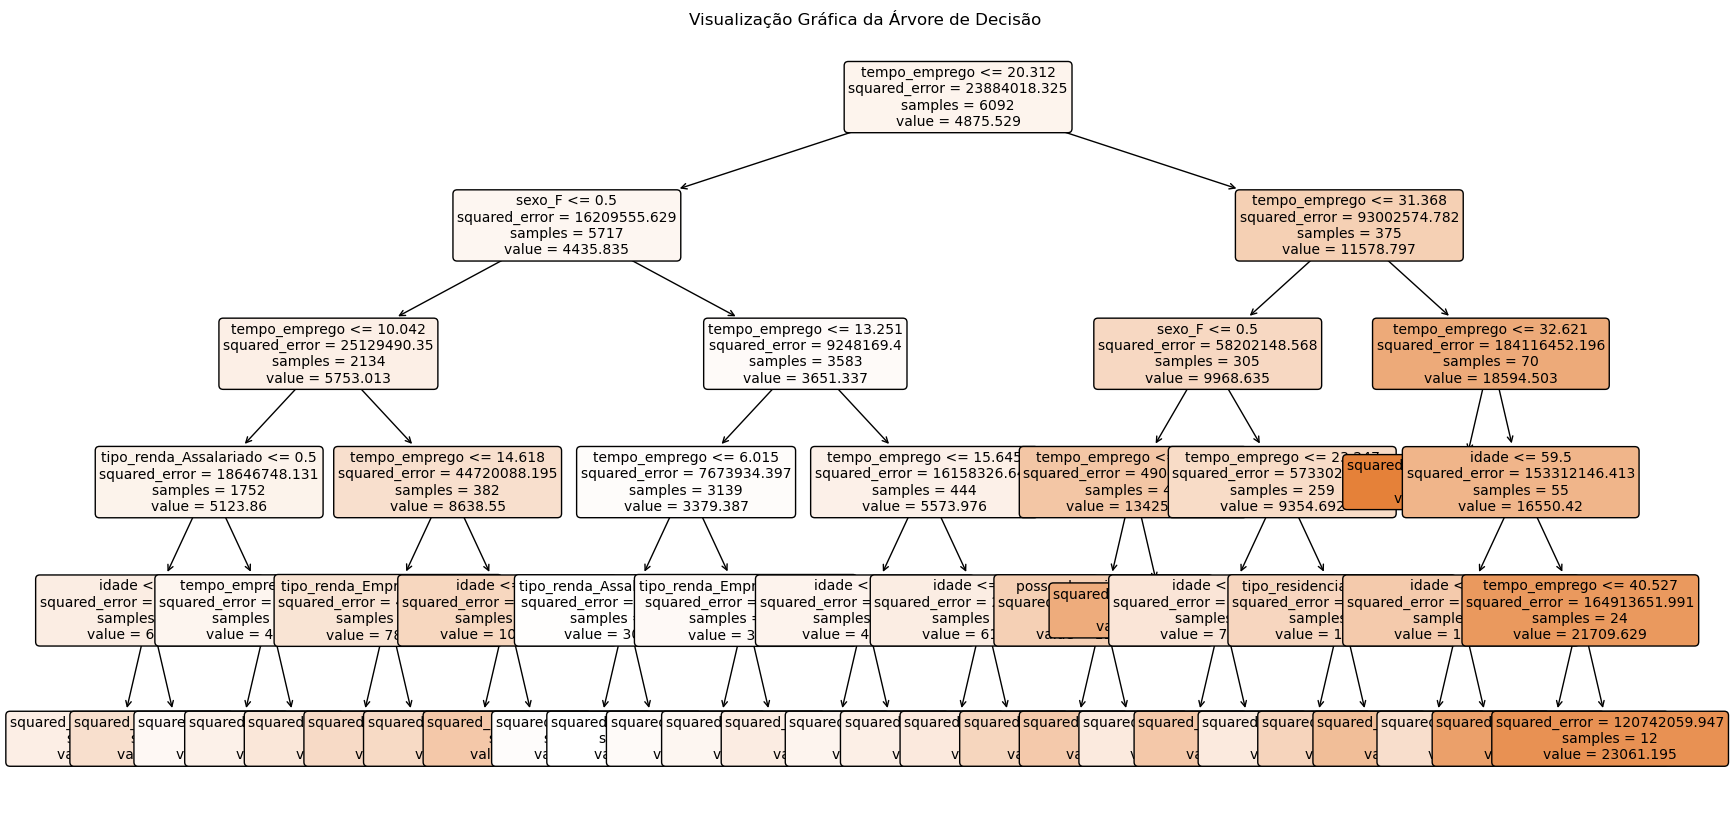

In [335]:
plt.figure(figsize=(20,10))
tree.plot_tree(melhor_modelo, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Visualização Gráfica da Árvore de Decisão")
plt.show()

### Visualização impressa da árvore

In [338]:
text_representation = tree.export_text(melhor_modelo, feature_names=list(X.columns))
print("Visualização Impressa da Árvore de Decisão:")
print(text_representation)

Visualização Impressa da Árvore de Decisão:
|--- tempo_emprego <= 20.31
|   |--- sexo_F <= 0.50
|   |   |--- tempo_emprego <= 10.04
|   |   |   |--- tipo_renda_Assalariado <= 0.50
|   |   |   |   |--- idade <= 54.50
|   |   |   |   |   |--- value: [5867.78]
|   |   |   |   |--- idade >  54.50
|   |   |   |   |   |--- value: [8657.12]
|   |   |   |--- tipo_renda_Assalariado >  0.50
|   |   |   |   |--- tempo_emprego <= 4.69
|   |   |   |   |   |--- value: [4144.52]
|   |   |   |   |--- tempo_emprego >  4.69
|   |   |   |   |   |--- value: [5395.93]
|   |   |--- tempo_emprego >  10.04
|   |   |   |--- tempo_emprego <= 14.62
|   |   |   |   |--- tipo_renda_Empresário <= 0.50
|   |   |   |   |   |--- value: [7280.73]
|   |   |   |   |--- tipo_renda_Empresário >  0.50
|   |   |   |   |   |--- value: [9560.01]
|   |   |   |--- tempo_emprego >  14.62
|   |   |   |   |--- idade <= 46.50
|   |   |   |   |   |--- value: [9669.41]
|   |   |   |   |--- idade >  46.50
|   |   |   |   |   |--- value

## Etapa 5 Crisp-DM: Avaliação dos resultados


### Avaliando Modelo Final

In [342]:
y_pred = melhor_modelo.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
r2 = melhor_modelo.score(X_test, y_test)

print(f"\nAvaliação do modelo final:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Avaliação do modelo final:
RMSE: 4487.07
R²: 0.1852


In [364]:
results_df = pd.DataFrame({
    'renda_real': y_test,
    'renda_prevista': np.round(y_pred, 2)
})
print(results_df)

       renda_real  renda_prevista
4123      1221.50         3661.70
2858      1690.81         2815.96
8659      2435.38         3661.70
1676      9121.06         5712.10
8517     30161.78        12700.03
...           ...             ...
3312      2512.03         7280.73
8955      7127.17        10725.74
4577      6239.13         5712.10
8456      4351.33         5395.93
13170    16233.55        14907.11

[2612 rows x 2 columns]


### Plotando predições vs valores reais

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [384]:
dados_entrada1 = {
    'sexo': 'M',
    'posse_de_veiculo': False,
    'posse_de_imovel': True,
    'qtd_filhos': 1,
    'tipo_renda': 'Assalariado',
    'educacao': 'Superior completo',
    'estado_civil': 'Solteiro',
    'tipo_residencia': 'Casa',
    'idade': 34,
    'tempo_emprego': 5,
    'qt_pessoas_residencia': 1
}

dados_entrada2 = {
    'sexo': 'F',
    'posse_de_veiculo': True,
    'posse_de_imovel': False,
    'qtd_filhos': 2,
    'tipo_renda': 'Empresário',
    'educacao': 'Pós graduação',
    'estado_civil': 'Casado',
    'tipo_residencia': 'Apartamento',
    'idade': 42,
    'tempo_emprego': 15,
    'qt_pessoas_residencia': 4
}

# Criar DataFrame com os dados de entrada
entrada = pd.DataFrame([dados_entrada1, dados_entrada2])

# Aplicar one-hot encoding
entrada_encoded = pd.get_dummies(entrada)

# Garantir que todas as colunas do modelo estejam presentes
entrada_processada = entrada_encoded.reindex(columns=X.columns, fill_value=0)

# Fazer a previsão
rendas_previstas = melhor_modelo.predict(entrada_processada)

print(f"Renda estimada para entrada 1: R${rendas_previstas[0]:.2f}")
print(f"Renda estimada para entrada 2: R${rendas_previstas[1]:.2f}")

Renda estimada para entrada 1: R$5395.93
Renda estimada para entrada 2: R$4764.29
